In [1]:
from PIL import Image, ImageDraw, ImageFont
import cv2
import os
import numpy as np

# Input multi-page TIFF file
input_tiff = 'C:/Users/vkuma/Downloads/QD 5Hz AChR cell9.tif'

# Output directory for MP4 videos with a scale bar and label at the top right
output_dir = 'output_videos_with_scale_bar_top_right/'
os.makedirs(output_dir, exist_ok=True)

# Frames per second (adjust as needed)
fps = 120

# List of brightness adjustment factors
brightness_factors = [4.0]

# Open the multi-page TIFF file
multi_page_tiff = Image.open(input_tiff)

# Get the dimensions of the TIFF pages
width, height = multi_page_tiff.size

# Calculate the global maximum value for normalization
global_max = -1  # Initialize with a very small value

# Loop through the pages to find the global maximum
for page_num in range(multi_page_tiff.n_frames):
    multi_page_tiff.seek(page_num)
    page = multi_page_tiff.copy()
    
    # Convert the image to a NumPy array
    page_array = np.array(page)
    
    # Find the maximum intensity value in the current frame
    max_intensity = page_array.max()
    
    # Update the global maximum if necessary
    if max_intensity > global_max:
        global_max = max_intensity

# Define scale bar parameters
scale_bar_length_um = 10.0  # Length of the scale bar in micrometers
scale_bar_height = 10  # Height of the scale bar in pixels
scale_bar_color = (255, 255, 255)  # White color
scale_bar_background_color = (0, 0, 0)  # Black background

# Create the scale bar image
scale_bar_length_pixels = 100
scale_bar_image = Image.new('RGB', (scale_bar_length_pixels, scale_bar_height), scale_bar_background_color)
draw = ImageDraw.Draw(scale_bar_image)
draw.rectangle([0, 0, scale_bar_length_pixels, scale_bar_height], outline=scale_bar_color, fill=scale_bar_color)

# Add the text "5 microns" on top of the scale bar
label_text = '5 microns'
label_font = ImageFont.load_default()  # You can use a custom font and size here
label_color = (0, 0, 0)  # Black color
left, top, right, bottom = label_font.getbbox(label_text)
label_height = np.abs(top - bottom)
label_width = np.abs(left - right)
label_position = (scale_bar_length_pixels, (scale_bar_height - label_height) // 2)
draw.text(label_position, label_text, fill=label_color, font=label_font)

# Loop through each brightness factor
for brightness_factor in brightness_factors:
    temp_dir = 'temp_frames/'
    os.makedirs(temp_dir, exist_ok=True)

    # Initialize the video writer
    output_video = os.path.join(output_dir, f'output_{brightness_factor:.1f}_with_scale_bar_top_right.mp4')
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4
    out = cv2.VideoWriter(output_video, fourcc, fps, (width, height))

    # Loop through the pages and save each page with the scale bar and label
    for page_num in range(multi_page_tiff.n_frames):
        multi_page_tiff.seek(page_num)
        page = multi_page_tiff.copy()
        
        # Convert the image to a NumPy array
        page_array = np.array(page)
        
        # Normalize the image intensities based on the global maximum
        if global_max > 0:
            page_array = (page_array / global_max * 255).astype('uint8')
        
        # Adjust the brightness of the image
        page_array = (page_array * brightness_factor).clip(0, 255).astype('uint8')
        
        # Convert the NumPy array back to a PIL Image
        page = Image.fromarray(page_array)
        
        # Create a new image with the scale bar and label at the top right
        image_with_scale_bar = Image.new('RGB', (width, height + scale_bar_height))
        image_with_scale_bar.paste(page, (0, 0))
        image_with_scale_bar.paste(scale_bar_image, (width - scale_bar_length_pixels, height))
        
        image_with_scale_bar.save(os.path.join(temp_dir, f'frame_{page_num:04d}.png'))

    # Get a list of image files in the temporary directory
    image_files = [os.path.join(temp_dir, f) for f in os.listdir(temp_dir) if f.endswith('.png')]

    # Sort the image files by name to maintain their order in the video
    image_files.sort()

    # Loop through the image files and write them to the video
    for image_file in image_files:
        img = cv2.imread(image_file)
        out.write(img)

    # Release the video writer
    out.release()

    # Remove temporary image frames and directory
    for image_file in image_files:
        os.remove(image_file)
    os.rmdir(temp_dir)

print("MP4 videos with scale bar and label at the top right saved in the output directory.")

KeyboardInterrupt: 

In [4]:
import cv2

# Open the video file
video_path = "C:/Users/vkuma\PresseLab/Research/GPcurve/output_videos/output_4.0.mp4"
cap = cv2.VideoCapture(video_path)

# Check if the video file was opened successfully
if not cap.isOpened():
    print("Error: Could not open video file.")
    exit()

# Read the first frame
ret, frame = cap.read()

# Check if the frame was read successfully
if not ret:
    print("Error: Could not read the first frame.")
    cap.release()
    exit()

# Define the output file name
output_image_path = 'first_frame.png'

# Save the first frame as a PNG image without compression
cv2.imwrite(output_image_path, frame, [cv2.IMWRITE_PNG_COMPRESSION, 0])

# Release the video capture object
cap.release()

print(f"The first frame has been saved as {output_image_path}")


The first frame has been saved as first_frame.png


In [2]:
from PIL import Image, ImageDraw, ImageFont
import cv2
import os
import numpy as np

# Input multi-page TIFF file
input_tiff = 'C:/Users/vkuma/Downloads/QD 5Hz AChR cell.tif'

# Output directory for MP4 videos with a scale bar
output_dir = 'output_videos_with_scale_bar/'
os.makedirs(output_dir, exist_ok=True)

# Frames per second (adjust as needed)
fps = 120

# List of brightness adjustment factors
brightness_factors = [4.0]

# Open the multi-page TIFF file
multi_page_tiff = Image.open(input_tiff)

# Get the dimensions of the TIFF pages
width, height = multi_page_tiff.size

# Calculate the global maximum value for normalization
global_max = -1  # Initialize with a very small value

# Loop through the pages to find the global maximum
for page_num in range(multi_page_tiff.n_frames):
    multi_page_tiff.seek(page_num)
    page = multi_page_tiff.copy()
    
    # Convert the image to a NumPy array
    page_array = np.array(page)
    
    # Find the maximum intensity value in the current frame
    max_intensity = page_array.max()
    
    # Update the global maximum if necessary
    if max_intensity > global_max:
        global_max = max_intensity

# Define scale bar parameters
scale_bar_length_um = 10.0  # Length of the scale bar in micrometers
scale_bar_height = 10  # Height of the scale bar in pixels
scale_bar_color = (255, 255, 255)  # White color
scale_bar_background_color = (0, 0, 0)  # Black background

# Create the scale bar image
scale_bar_length_pixels = 100
scale_bar_image = Image.new('RGB', (scale_bar_length_pixels, scale_bar_height), scale_bar_background_color)
draw = ImageDraw.Draw(scale_bar_image)
draw.rectangle([0, 0, scale_bar_length_pixels, scale_bar_height], outline=scale_bar_color, fill=scale_bar_color)

# Add the text "5 microns" on top of the scale bar
label_text = '5 microns'
label_font = ImageFont.load_default()  # You can use a custom font and size here
label_color = (0, 0, 0)  # Black color
label_width, label_height = label_font.getsize(label_text)
label_position = ((scale_bar_length_pixels - label_width) // 2, -1)  # Place label at the last row of 10 pixels
draw.text(label_position, label_text, fill=label_color, font=label_font)

# Loop through each brightness factor
for brightness_factor in brightness_factors:
    temp_dir = 'temp_frames/'
    os.makedirs(temp_dir, exist_ok=True)

    # Initialize the video writer
    output_video = os.path.join(output_dir, f'output_{brightness_factor:.1f}_with_scale_bar.mp4')
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4
    out = cv2.VideoWriter(output_video, fourcc, fps, (width, height + scale_bar_height))

    # Loop through the pages and save each page with the scale bar
    for page_num in range(multi_page_tiff.n_frames):
        multi_page_tiff.seek(page_num)
        page = multi_page_tiff.copy()
        
        # Convert the image to a NumPy array
        page_array = np.array(page)
        
        # Normalize the image intensities based on the global maximum
        if global_max > 0:
            page_array = (page_array / global_max * 255).astype('uint8')
        
        # Adjust the brightness of the image
        page_array = (page_array * brightness_factor).clip(0, 255).astype('uint8')
        
        # Convert the NumPy array back to a PIL Image
        page = Image.fromarray(page_array)
        
        # Create a new image with the scale bar at the bottom
        image_with_scale_bar = Image.new('RGB', (width, height + scale_bar_height))
        image_with_scale_bar.paste(page, (0, 0))
        image_with_scale_bar.paste(scale_bar_image, (0, height))
        
        image_with_scale_bar.save(os.path.join(temp_dir, f'frame_{page_num:04d}.png'))

    # Get a list of image files in the temporary directory
    image_files = [os.path.join(temp_dir, f) for f in os.listdir(temp_dir) if f.endswith('.png')]

    # Sort the image files by name to maintain their order in the video
    image_files.sort()

    # Loop through the image files and write them to the video
    for image_file in image_files:
        img = cv2.imread(image_file)
        out.write(img)

    # Release the video writer
    out.release()

    # Remove temporary image frames and directory
    for image_file in image_files:
        os.remove(image_file)
    os.rmdir(temp_dir)

print("MP4 videos with scale bar saved in the output directory.")

C:\Users\vkuma\AppData\Local\Temp\ipykernel_11600\2380930803.py:59: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  label_width, label_height = label_font.getsize(label_text)


MP4 videos with scale bar saved in the output directory.


In [44]:
from PIL import Image, ImageDraw
import cv2
import os
import numpy as np

# Input multi-page TIFF file
input_tiff = 'C:/Users/vkuma/Downloads/QD 5Hz AChR cell9.tif'

# Output directory for MP4 videos with a scale bar
output_dir = 'output_videos_with_scale_bar/'
os.makedirs(output_dir, exist_ok=True)

# Frames per second (adjust as needed)
fps = 120

# List of brightness adjustment factors
brightness_factors = [1.0, 2.0, 3.0, 4.0, 5.0, 10.0]

# Open the multi-page TIFF file
multi_page_tiff = Image.open(input_tiff)

# Get the dimensions of the TIFF pages
width, height = multi_page_tiff.size

# Calculate the global maximum value for normalization
global_max = -1  # Initialize with a very small value

# Loop through the pages to find the global maximum
for page_num in range(multi_page_tiff.n_frames):
    multi_page_tiff.seek(page_num)
    page = multi_page_tiff.copy()
    
    # Convert the image to a NumPy array
    page_array = np.array(page)
    
    # Find the maximum intensity value in the current frame
    max_intensity = page_array.max()
    
    # Update the global maximum if necessary
    if max_intensity > global_max:
        global_max = max_intensity

# Define scale bar parameters
scale_bar_length_um = 10.0  # Length of the scale bar in micrometers
scale_bar_height = 10  # Height of the scale bar in pixels
scale_bar_color = (255, 255, 255)  # White color
scale_bar_background_color = (0, 0, 0)  # Black background

# Create the scale bar image
scale_bar_length_pixels = int(scale_bar_length_um * (height / global_max))
scale_bar_image = Image.new('RGB', (scale_bar_length_pixels, scale_bar_height), scale_bar_background_color)
draw = ImageDraw.Draw(scale_bar_image)
draw.rectangle([0, 0, scale_bar_length_pixels, scale_bar_height], outline=scale_bar_color, fill=scale_bar_color)

# Loop through each brightness factor
for brightness_factor in brightness_factors:
    temp_dir = 'temp_frames/'
    os.makedirs(temp_dir, exist_ok=True)

    # Initialize the video writer
    output_video = os.path.join(output_dir, f'output_{brightness_factor:.1f}_with_scale_bar.mp4')
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4
    out = cv2.VideoWriter(output_video, fourcc, fps, (width, height + scale_bar_height))

    # Loop through the pages and save each page with the scale bar
    for page_num in range(multi_page_tiff.n_frames):
        multi_page_tiff.seek(page_num)
        page = multi_page_tiff.copy()
        
        # Convert the image to a NumPy array
        page_array = np.array(page)
        
        # Normalize the image intensities based on the global maximum
        if global_max > 0:
            page_array = (page_array / global_max * 255).astype('uint8')
        
        # Adjust the brightness of the image
        page_array = (page_array * brightness_factor).clip(0, 255).astype('uint8')
        
        # Convert the NumPy array back to a PIL Image
        page = Image.fromarray(page_array)
        
        # Create a new image with the scale bar at the bottom
        image_with_scale_bar = Image.new('RGB', (width, height + scale_bar_height))
        image_with_scale_bar.paste(page, (0, 0))
        image_with_scale_bar.paste(scale_bar_image, (0, height))
        
        image_with_scale_bar.save(os.path.join(temp_dir, f'frame_{page_num:04d}.png'))

    # Get a list of image files in the temporary directory
    image_files = [os.path.join(temp_dir, f) for f in os.listdir(temp_dir) if f.endswith('.png')]

    # Sort the image files by name to maintain their order in the video
    image_files.sort()

    # Loop through the image files and write them to the video
    for image_file in image_files:
        img = cv2.imread(image_file)
        out.write(img)

    # Release the video writer
    out.release()

    # Remove temporary image frames and directory
    for image_file in image_files:
        os.remove(image_file)
    os.rmdir(temp_dir)

print("MP4 videos with scale bar saved in the output directory.")


KeyboardInterrupt: 

In [51]:
from PIL import Image, ImageDraw, ImageFont
import cv2
import os
import numpy as np

# Input multi-page TIFF file
input_tiff = 'C:/Users/vkuma/Downloads/QD 5Hz AChR cell9.tif'

# Output directory for MP4 videos with a scale bar and label
output_dir = 'output_videos_with_scale_bar_and_label/'
os.makedirs(output_dir, exist_ok=True)

# Frames per second (adjust as needed)
fps = 120

# List of brightness adjustment factors
brightness_factors = [4.0]

# Open the multi-page TIFF file
multi_page_tiff = Image.open(input_tiff)

# Get the dimensions of the TIFF pages
width, height = multi_page_tiff.size

# Calculate the global maximum value for normalization
global_max = -1  # Initialize with a very small value

# Loop through the pages to find the global maximum
for page_num in range(multi_page_tiff.n_frames):
    multi_page_tiff.seek(page_num)
    page = multi_page_tiff.copy()
    
    # Convert the image to a NumPy array
    page_array = np.array(page)
    
    # Find the maximum intensity value in the current frame
    max_intensity = page_array.max()
    
    # Update the global maximum if necessary
    if max_intensity > global_max:
        global_max = max_intensity

# Define scale bar parameters
scale_bar_length_um = 10.0  # Length of the scale bar in micrometers
scale_bar_height = 10  # Height of the scale bar in pixels
scale_bar_color = (255, 255, 255)  # White color
scale_bar_background_color = (0, 0, 0)  # Black background
label_text = '10 microns'  # Text label next to the scale bar

# Create the scale bar image
scale_bar_length_pixels = 120
scale_bar_image = Image.new('RGB', (scale_bar_length_pixels, scale_bar_height), scale_bar_background_color)
draw = ImageDraw.Draw(scale_bar_image)
draw.rectangle([0, 0, scale_bar_length_pixels, scale_bar_height], outline=scale_bar_color, fill=scale_bar_color)

# Loop through each brightness factor
for brightness_factor in brightness_factors:
    temp_dir = 'temp_frames/'
    os.makedirs(temp_dir, exist_ok=True)

    # Initialize the video writer
    output_video = os.path.join(output_dir, f'output_{brightness_factor:.1f}_with_scale_bar_and_label.mp4')
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4
    out = cv2.VideoWriter(output_video, fourcc, fps, (width, height))

    # Loop through the pages and save each page with the scale bar
    for page_num in range(multi_page_tiff.n_frames):
        multi_page_tiff.seek(page_num)
        page = multi_page_tiff.copy()
        
        # Convert the image to a NumPy array
        page_array = np.array(page)
        
        # Normalize the image intensities based on the global maximum
        if global_max > 0:
            page_array = (page_array / global_max * 255).astype('uint8')
        
        # Adjust the brightness of the image
        page_array = (page_array * brightness_factor).clip(0, 255).astype('uint8')
        
        # Convert the NumPy array back to a PIL Image
        page = Image.fromarray(page_array)
        
        # Create a new image with the scale bar
        image_with_scale_bar = Image.new('RGB', (width, height + scale_bar_height))
        image_with_scale_bar.paste(page, (0, 0))
        image_with_scale_bar.paste(scale_bar_image, (0, height))
        
        # Add label text next to the scale bar
        draw = ImageDraw.Draw(image_with_scale_bar)
        label_font = ImageFont.load_default()
        label_color = (255, 255, 255)  # White color
        draw.text((scale_bar_length_pixels + 5, height), label_text, fill=label_color, font=label_font)
        
        image_with_scale_bar.save(os.path.join(temp_dir, f'frame_{page_num:04d}.png'))

    # Get a list of image files in the temporary directory
    image_files = [os.path.join(temp_dir, f) for f in os.listdir(temp_dir) if f.endswith('.png')]

    # Sort the image files by name to maintain their order in the video
    image_files.sort()

    # Loop through the image files and write them to the video
    for image_file in image_files:
        img = cv2.imread(image_file)
        out.write(img)

    # Release the video writer
    out.release()

    # Remove temporary image frames and directory
    for image_file in image_files:
        os.remove(image_file)
    os.rmdir(temp_dir)

print("MP4 videos with scale bar and label saved in the output directory.")


MP4 videos with scale bar and label saved in the output directory.


In [52]:
from PIL import Image, ImageDraw, ImageFont
import cv2
import os
import numpy as np

# Input multi-page TIFF file
input_tiff = 'C:/Users/vkuma/Downloads/QD 5Hz AChR cell9.tif'

# Output directory for MP4 videos with a scale bar
output_dir = 'output_videos_with_scale_bar_label/'
os.makedirs(output_dir, exist_ok=True)

# Frames per second (adjust as needed)
fps = 120

# List of brightness adjustment factors
brightness_factors = [4.0]

# Open the multi-page TIFF file
multi_page_tiff = Image.open(input_tiff)

# Get the dimensions of the TIFF pages
width, height = multi_page_tiff.size

# Calculate the global maximum value for normalization
global_max = -1  # Initialize with a very small value

# Loop through the pages to find the global maximum
for page_num in range(multi_page_tiff.n_frames):
    multi_page_tiff.seek(page_num)
    page = multi_page_tiff.copy()
    
    # Convert the image to a NumPy array
    page_array = np.array(page)
    
    # Find the maximum intensity value in the current frame
    max_intensity = page_array.max()
    
    # Update the global maximum if necessary
    if max_intensity > global_max:
        global_max = max_intensity

# Define scale bar parameters
scale_bar_length_um = 10.0  # Length of the scale bar in micrometers
scale_bar_height = 10  # Height of the scale bar in pixels
scale_bar_color = (255, 255, 255)  # White color
scale_bar_background_color = (0, 0, 0)  # Black background

# Create the scale bar image
scale_bar_length_pixels = 100
scale_bar_image = Image.new('RGB', (scale_bar_length_pixels, scale_bar_height), scale_bar_background_color)
draw = ImageDraw.Draw(scale_bar_image)
draw.rectangle([0, 0, scale_bar_length_pixels, scale_bar_height], outline=scale_bar_color, fill=scale_bar_color)

# Add the text "5 microns" on top of the scale bar
label_text = '5 microns'
label_font = ImageFont.load_default()  # You can use a custom font and size here
label_color = (0, 0, 0)  # Black color
label_width, label_height = label_font.getsize(label_text)
label_position = ((scale_bar_length_pixels - label_width) // 2, (scale_bar_height - label_height) // 2)
draw.text(label_position, label_text, fill=label_color, font=label_font)

# Loop through each brightness factor
for brightness_factor in brightness_factors:
    temp_dir = 'temp_frames/'
    os.makedirs(temp_dir, exist_ok=True)

    # Initialize the video writer
    output_video = os.path.join(output_dir, f'output_{brightness_factor:.1f}_with_scale_bar.mp4')
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4
    out = cv2.VideoWriter(output_video, fourcc, fps, (width, height + scale_bar_height))

    # Loop through the pages and save each page with the scale bar
    for page_num in range(multi_page_tiff.n_frames):
        multi_page_tiff.seek(page_num)
        page = multi_page_tiff.copy()
        
        # Convert the image to a NumPy array
        page_array = np.array(page)
        
        # Normalize the image intensities based on the global maximum
        if global_max > 0:
            page_array = (page_array / global_max * 255).astype('uint8')
        
        # Adjust the brightness of the image
        page_array = (page_array * brightness_factor).clip(0, 255).astype('uint8')
        
        # Convert the NumPy array back to a PIL Image
        page = Image.fromarray(page_array)
        
        # Create a new image with the scale bar at the bottom
        image_with_scale_bar = Image.new('RGB', (width, height + scale_bar_height))
        image_with_scale_bar.paste(page, (0, 0))
        image_with_scale_bar.paste(scale_bar_image, (0, height))
        
        image_with_scale_bar.save(os.path.join(temp_dir, f'frame_{page_num:04d}.png'))

    # Get a list of image files in the temporary directory
    image_files = [os.path.join(temp_dir, f) for f in os.listdir(temp_dir) if f.endswith('.png')]

    # Sort the image files by name to maintain their order in the video
    image_files.sort()

    # Loop through the image files and write them to the video
    for image_file in image_files:
        img = cv2.imread(image_file)
        out.write(img)

    # Release the video writer
    out.release()

    # Remove temporary image frames and directory
    for image_file in image_files:
        os.remove(image_file)
    os.rmdir(temp_dir)

print("MP4 videos with scale bar saved in the output directory.")


C:\Users\vkuma\AppData\Local\Temp\ipykernel_16308\1683560465.py:59: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  label_width, label_height = label_font.getsize(label_text)


MP4 videos with scale bar saved in the output directory.


In [49]:
from PIL import Image, ImageDraw
import cv2
import os
import numpy as np

# Input multi-page TIFF file
input_tiff = 'C:/Users/vkuma/Downloads/QD 5Hz AChR cell9.tif'

# Output directory for MP4 videos with a scale bar
output_dir = 'output_videos_with_scale_bar/'
os.makedirs(output_dir, exist_ok=True)

# Frames per second (adjust as needed)
fps = 120

# List of brightness adjustment factors
brightness_factors = [4.0]

# Open the multi-page TIFF file
multi_page_tiff = Image.open(input_tiff)

# Get the dimensions of the TIFF pages
width, height = multi_page_tiff.size

# Calculate the global maximum value for normalization
global_max = -1  # Initialize with a very small value

# Loop through the pages to find the global maximum
for page_num in range(multi_page_tiff.n_frames):
    multi_page_tiff.seek(page_num)
    page = multi_page_tiff.copy()
    
    # Convert the image to a NumPy array
    page_array = np.array(page)
    
    # Find the maximum intensity value in the current frame
    max_intensity = page_array.max()
    
    # Update the global maximum if necessary
    if max_intensity > global_max:
        global_max = max_intensity

# Define scale bar parameters
scale_bar_length_um = 10.0  # Length of the scale bar in micrometers
scale_bar_height = 10  # Height of the scale bar in pixels
scale_bar_color = (255, 255, 255)  # White color
scale_bar_background_color = (0, 0, 0)  # Black background

# Create the scale bar image
scale_bar_length_pixels = 100
scale_bar_image = Image.new('RGB', (scale_bar_length_pixels, scale_bar_height), scale_bar_background_color)
draw = ImageDraw.Draw(scale_bar_image)
draw.rectangle([0, 0, scale_bar_length_pixels, scale_bar_height], outline=scale_bar_color, fill=scale_bar_color)

# Loop through each brightness factor
for brightness_factor in brightness_factors:
    temp_dir = 'temp_frames/'
    os.makedirs(temp_dir, exist_ok=True)

    # Initialize the video writer
    output_video = os.path.join(output_dir, f'output_{brightness_factor:.1f}_with_scale_bar.mp4')
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4
    out = cv2.VideoWriter(output_video, fourcc, fps, (width, height + scale_bar_height))

    # Loop through the pages and save each page with the scale bar
    for page_num in range(multi_page_tiff.n_frames):
        multi_page_tiff.seek(page_num)
        page = multi_page_tiff.copy()
        
        # Convert the image to a NumPy array
        page_array = np.array(page)
        
        # Normalize the image intensities based on the global maximum
        if global_max > 0:
            page_array = (page_array / global_max * 255).astype('uint8')
        
        # Adjust the brightness of the image
        page_array = (page_array * brightness_factor).clip(0, 255).astype('uint8')
        
        # Convert the NumPy array back to a PIL Image
        page = Image.fromarray(page_array)
        
        # Create a new image with the scale bar at the bottom
        image_with_scale_bar = Image.new('RGB', (width, height + scale_bar_height))
        image_with_scale_bar.paste(page, (0, 0))
        image_with_scale_bar.paste(scale_bar_image, (0, height))
        
        image_with_scale_bar.save(os.path.join(temp_dir, f'frame_{page_num:04d}.png'))

    # Get a list of image files in the temporary directory
    image_files = [os.path.join(temp_dir, f) for f in os.listdir(temp_dir) if f.endswith('.png')]

    # Sort the image files by name to maintain their order in the video
    image_files.sort()

    # Loop through the image files and write them to the video
    for image_file in image_files:
        img = cv2.imread(image_file)
        out.write(img)

    # Release the video writer
    out.release()

    # Remove temporary image frames and directory
    for image_file in image_files:
        os.remove(image_file)
    os.rmdir(temp_dir)

print("MP4 videos with scale bar saved in the output directory.")


MP4 videos with scale bar saved in the output directory.


In [48]:
from PIL import Image, ImageDraw, ImageFont
import cv2
import os
import numpy as np

# Input multi-page TIFF file
input_tiff = 'C:/Users/vkuma/Downloads/QD 5Hz AChR cell9.tif'

# Output directory for MP4 videos with a scale bar and label
output_dir = 'output_videos_with_scale_bar_and_label/'
os.makedirs(output_dir, exist_ok=True)

# Frames per second (adjust as needed)
fps = 120

# List of brightness adjustment factors
brightness_factors = [4.0]

# Open the multi-page TIFF file
multi_page_tiff = Image.open(input_tiff)

# Get the dimensions of the TIFF pages
width, height = multi_page_tiff.size

# Calculate the global maximum value for normalization
global_max = -1  # Initialize with a very small value

# Loop through the pages to find the global maximum
for page_num in range(multi_page_tiff.n_frames):
    multi_page_tiff.seek(page_num)
    page = multi_page_tiff.copy()
    
    # Convert the image to a NumPy array
    page_array = np.array(page)
    
    # Find the maximum intensity value in the current frame
    max_intensity = page_array.max()
    
    # Update the global maximum if necessary
    if max_intensity > global_max:
        global_max = max_intensity

# Define scale bar parameters
scale_bar_length_um = 10.0  # Length of the scale bar in micrometers
scale_bar_height = 10  # Height of the scale bar in pixels
scale_bar_color = (255, 255, 255)  # White color
scale_bar_background_color = (0, 0, 0)  # Black background
label_text = '10 μm'  # Text label next to the scale bar

# Create the scale bar image
scale_bar_length_pixels = 100
scale_bar_image = Image.new('RGB', (scale_bar_length_pixels, scale_bar_height), scale_bar_background_color)
draw = ImageDraw.Draw(scale_bar_image)
draw.rectangle([0, 0, scale_bar_length_pixels, scale_bar_height], outline=scale_bar_color, fill=scale_bar_color)

# Load a font that supports Unicode characters
label_font = ImageFont.truetype("arial.ttf", 14)  # Adjust the font and size as needed
label_width, label_height = label_font.getsize(label_text)

# Create the label image
label_image = Image.new('RGB', (label_width, label_height), scale_bar_background_color)
label_draw = ImageDraw.Draw(label_image)
label_draw.text((0, 0), label_text, fill=scale_bar_color, font=label_font)

# Loop through each brightness factor
for brightness_factor in brightness_factors:
    temp_dir = 'temp_frames/'
    os.makedirs(temp_dir, exist_ok=True)

    # Initialize the video writer
    output_video = os.path.join(output_dir, f'output_{brightness_factor:.1f}_with_scale_bar_and_label.mp4')
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4
    out = cv2.VideoWriter(output_video, fourcc, fps, (width, height + scale_bar_height))

    # Loop through the pages and save each page with the scale bar and label
    for page_num in range(multi_page_tiff.n_frames):
        multi_page_tiff.seek(page_num)
        page = multi_page_tiff.copy()
        
        # Convert the image to a NumPy array
        page_array = np.array(page)
        
        # Normalize the image intensities based on the global maximum
        if global_max > 0:
            page_array = (page_array / global_max * 255).astype('uint8')
        
        # Adjust the brightness of the image
        page_array = (page_array * brightness_factor).clip(0, 255).astype('uint8')
        
        # Convert the NumPy array back to a PIL Image
        page = Image.fromarray(page_array)
        
        # Create a new image with the scale bar, label, and label next to the scale bar
        image_with_scale_bar_and_label = Image.new('RGB', (width + label_width, height + scale_bar_height))
        image_with_scale_bar_and_label.paste(page, (0, 0))
        image_with_scale_bar_and_label.paste(scale_bar_image, (0, height))
        image_with_scale_bar_and_label.paste(label_image, (scale_bar_length_pixels, height))
        
        image_with_scale_bar_and_label.save(os.path.join(temp_dir, f'frame_{page_num:04d}.png'))

    # Get a list of image files in the temporary directory
    image_files = [os.path.join(temp_dir, f) for f in os.listdir(temp_dir) if f.endswith('.png')]

    # Sort the image files by name to maintain their order in the video
    image_files.sort()

    # Loop through the image files and write them to the video
    for image_file in image_files:
        img = cv2.imread(image_file)
        out.write(img)

    # Release the video writer
    out.release()

    # Remove temporary image frames and directory
    for image_file in image_files:
        os.remove(image_file)
    os.rmdir(temp_dir)

print("MP4 videos with scale bar and label saved in the output directory.")


C:\Users\vkuma\AppData\Local\Temp\ipykernel_16308\791279262.py:58: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  label_width, label_height = label_font.getsize(label_text)


MP4 videos with scale bar and label saved in the output directory.


In [10]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np

# Input multi-page TIFF file
input_tiff = 'C:/Users/vkuma/Downloads/QD 5Hz AChR cell9.tif'

# Output PNG file
output_png = 'output_first_page_with_scale_bar.png'

# Open the multi-page TIFF file
multi_page_tiff = Image.open(input_tiff)

# Get the dimensions of the TIFF pages
width, height = multi_page_tiff.size

# Calculate the global maximum value for normalization
global_max = -1  # Initialize with a very small value

# Loop through the pages to find the global maximum
for page_num in range(multi_page_tiff.n_frames):
    multi_page_tiff.seek(page_num)
    page = multi_page_tiff.copy()

    # Convert the image to a NumPy array
    page_array = np.array(page)

    # Find the maximum intensity value in the current frame
    max_intensity = page_array.max()

    # Update the global maximum if necessary
    if max_intensity > global_max:
        global_max = max_intensity

# Define scale bar parameters
scale_bar_length_um = 5.0  # Length of the scale bar in micrometers
scale_bar_height = 10  # Height of the scale bar in pixels
scale_bar_color = (255, 255, 255)  # White color
scale_bar_background_color = (0, 0, 0)  # Black background

# Create the scale bar image
scale_bar_length_pixels = 100
scale_bar_image = Image.new('RGB', (scale_bar_length_pixels, scale_bar_height), scale_bar_background_color)
draw = ImageDraw.Draw(scale_bar_image)
draw.rectangle([0, 0, scale_bar_length_pixels, scale_bar_height], outline=scale_bar_color, fill=scale_bar_color)

# Add the text "5 microns" on top of the scale bar
label_text = '5 microns'
label_font = ImageFont.load_default()  # You can use a custom font and size here
label_color = (0, 0, 0)  # Black color
label_width, label_height = label_font.getsize(label_text)
label_position = ((scale_bar_length_pixels - label_width) // 2, -1)  # Place label at the last row of 10 pixels

# Create a new image with the scale bar and label
image_with_scale_bar = Image.new('RGB', (width, height + scale_bar_height))
image_with_scale_bar.paste(multi_page_tiff, (0, 0))
image_with_scale_bar.paste(scale_bar_image, (0, height))
draw = ImageDraw.Draw(image_with_scale_bar)
draw.text(label_position, label_text, fill=label_color, font=label_font)

# Save the image with the scale bar and label as a PNG
image_with_scale_bar.save(output_png)

print(f"First page with scale bar and label saved as {output_png}.")

First page with scale bar and label saved as output_first_page_with_scale_bar.png.


C:\Users\vkuma\AppData\Local\Temp\ipykernel_23488\2273952136.py:50: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  label_width, label_height = label_font.getsize(label_text)


In [15]:
height*97
# Should be approx 50 micron square
# This does not align with the 25 micron squares that in have been drawing, I speculate that is because of where protein localization is and it
# is in a 25 micron square rather than the whole domain

49664

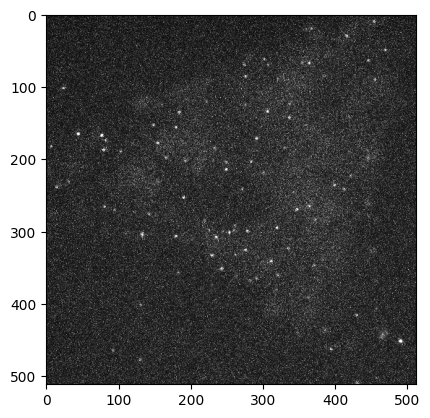

In [5]:
from matplotlib import pyplot as plt
import numpy as np

# Load the image
img = plt.imread('C:/Users/vkuma/Downloads/QD 5Hz AChR cell9.tif')

# Normalize the image
img_normalized = (img - img.min()) / (img.max() - img.min())

# Increase the brightness by a factor of 4
brightness_factor = 4
img_brightened = np.clip(img_normalized * brightness_factor, 0, 1)

# Display the brightened image in black and white
plt.imshow(img_brightened, cmap='gray')
plt.show()


In [8]:
img

array([[11, 38, 18, ..., 75, 28, 22],
       [37, 19, 51, ..., 53, 52, 46],
       [52, 12, 19, ..., 33, 27, 55],
       ...,
       [39, 35, 98, ..., 39, 27, 36],
       [66, 44, 46, ..., 71, 46, 63],
       [88, 27, 19, ..., 41, 44, 23]], dtype=uint16)